In [1]:
%load_ext blackcellmagic

In [2]:
import plotly.offline as py
import plotly.graph_objs as go

from load_data import load_imdb_sentiment_analysis_dataset, _split_training_and_validation_sets
from vectorize_data import sequence_vectorize
from build_model import sepcnn_model
from train_sequence_model import train_sequence_model
from explore_data import *

Using TensorFlow backend.


In [3]:
train_val, test  = load_imdb_sentiment_analysis_dataset("data")
train, val = _split_training_and_validation_sets(train_val[0], train_val[1], 0.2)

In [4]:
train_samples = len(train[0])
train_words_per_sample = get_num_words_per_sample(train[0])
train_sample_word_ratio = train_samples / train_words_per_sample

print(f"""
Train samples {train_samples} 
Train median words/sample: {train_words_per_sample}
Train Samples / (words/sample): {train_sample_word_ratio}
Sample-word ratio > 1500: {train_sample_word_ratio > 1500}""")

val_samples = len(val[0])
val_words_per_sample = get_num_words_per_sample(val[0])
val_sample_word_ratio = val_samples / val_words_per_sample

print(f"""
Validation samples {val_samples} 
Validation median words/sample: {val_words_per_sample}
Validation Samples / (words/sample): {val_sample_word_ratio}
Sample-word ratio > 1500: {train_sample_word_ratio > 1500}""")

test_samples = len(test[0])
test_words_per_sample = get_num_words_per_sample(test[0])
test_sample_word_ratio = test_samples / test_words_per_sample

print(f"""
Test samples {test_samples}
Test median words/sample: {test_words_per_sample}
Test Samples / (words/sample): {test_sample_word_ratio}
Sample-word ratio > 1500: {test_sample_word_ratio > 1500}""")


Train samples 20000 
Train median words/sample: 174.0
Train Samples / (words/sample): 114.94252873563218
Sample-word ratio > 1500: False

Validation samples 5000 
Validation median words/sample: 174.0
Validation Samples / (words/sample): 28.735632183908045
Sample-word ratio > 1500: False

Test samples 25000
Test median words/sample: 172.0
Test Samples / (words/sample): 145.34883720930233
Sample-word ratio > 1500: False


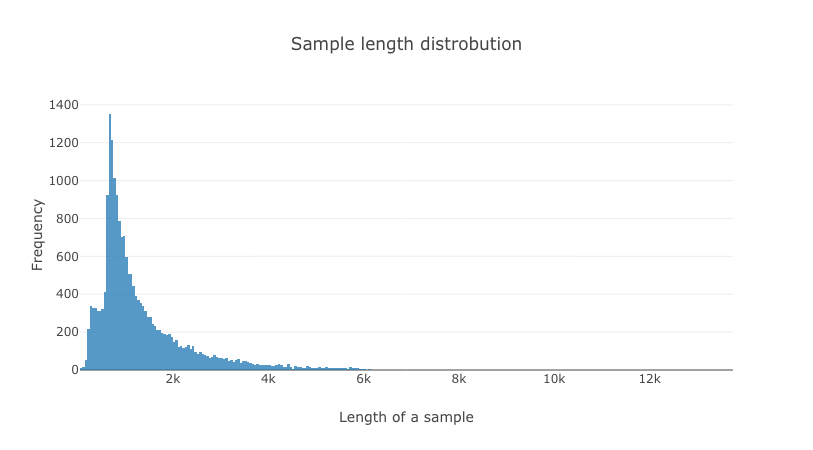

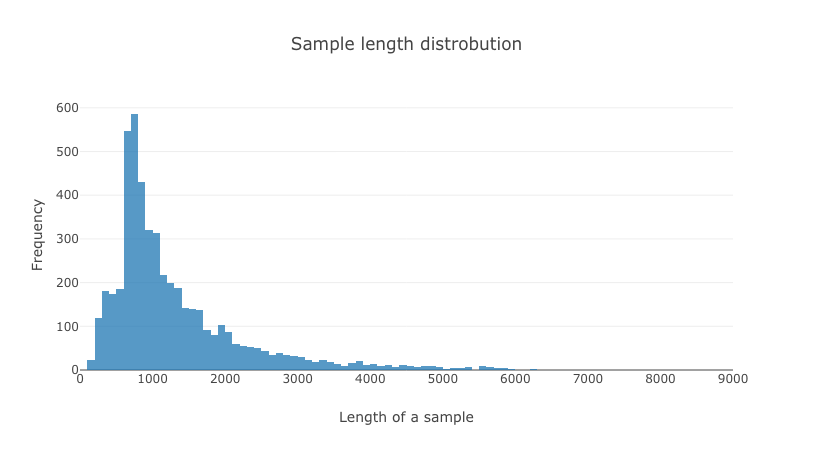

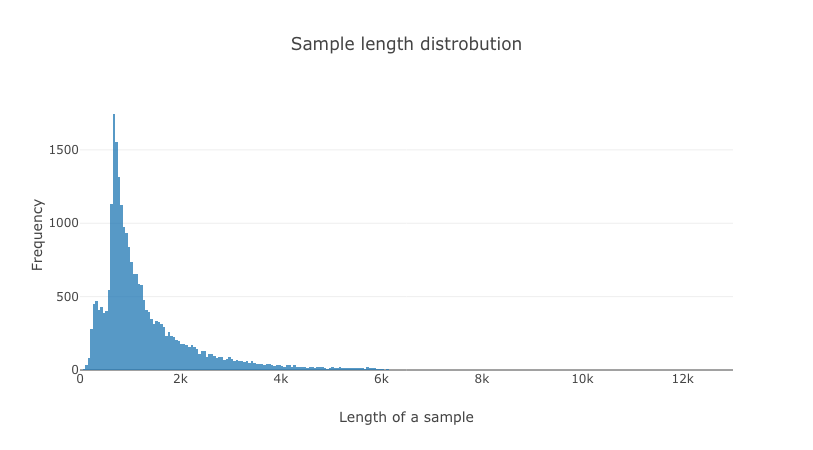

In [ ]:
plot_sample_length_distribution(train[0])
plot_sample_length_distribution(val[0])
plot_sample_length_distribution(test[0])

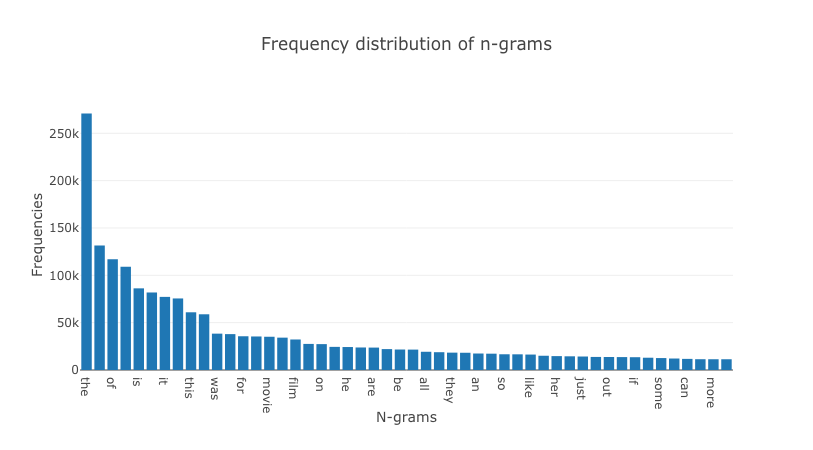

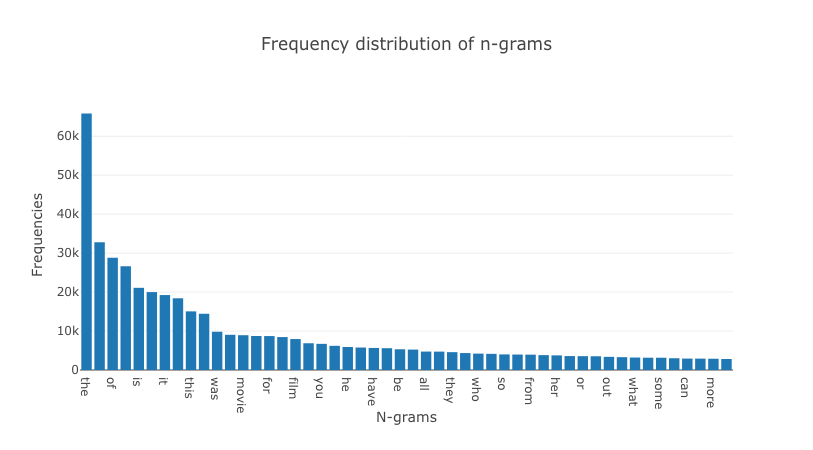

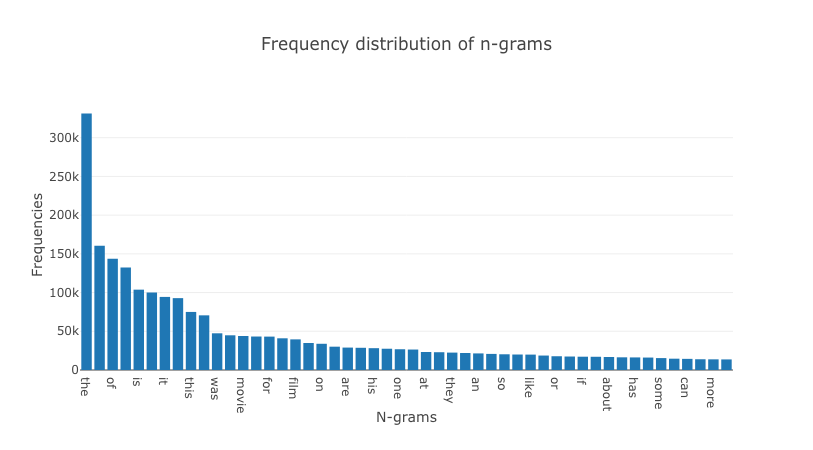

In [ ]:
plot_frequency_distribution_of_ngrams(train[0])
plot_frequency_distribution_of_ngrams(val[0])
plot_frequency_distribution_of_ngrams(test[0])

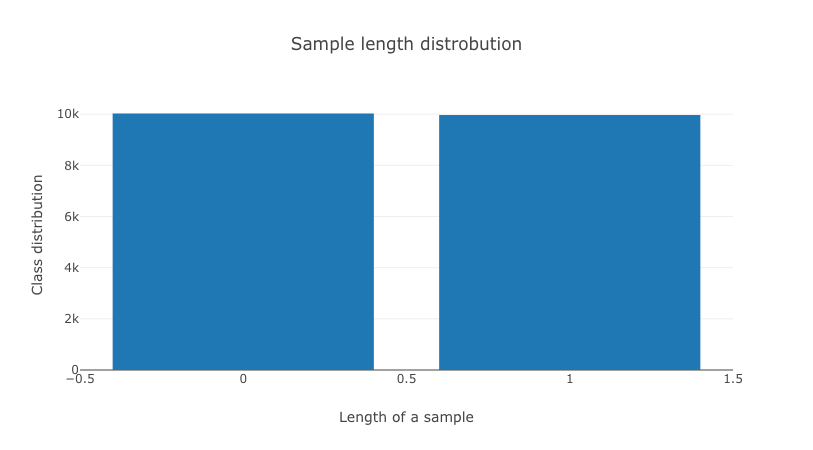

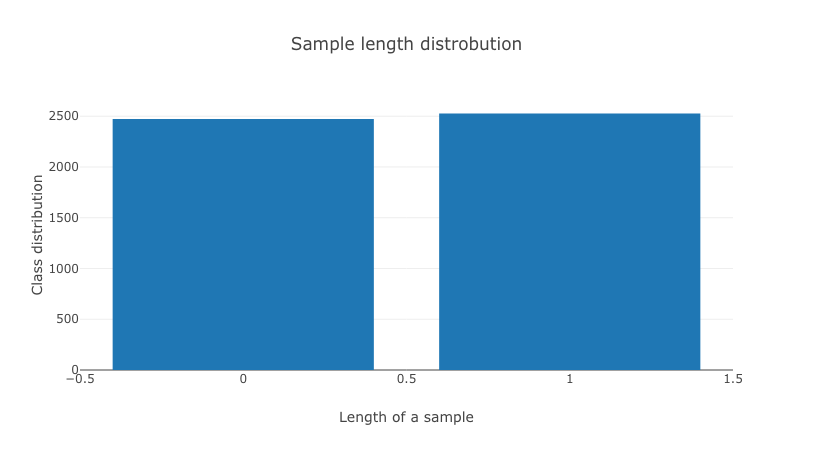

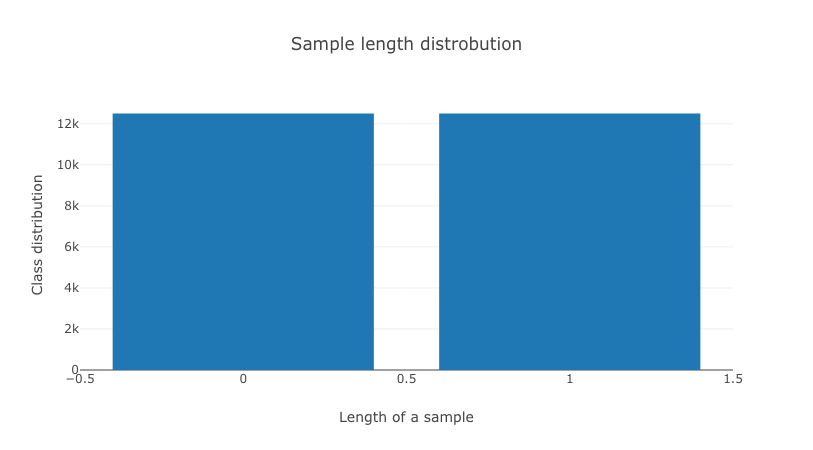

In [ ]:
plot_class_distribution(train[1])
plot_class_distribution(val[1])
plot_class_distribution(test[1])

In [ ]:
x_train, x_val, word_index = sequence_vectorize(train[0], val[0])

In [ ]:
model = sepcnn_model(
    blocks=2, 
    filters=64, 
    kernel_size=3, 
    embedding_dim=200, 
    dropout_rate=0.3,
    pool_size=int(x_train[0].shape[0]*.9),
    input_shape=x_train[0].shape,
    num_classes=2,
    num_features=20000,
)

In [ ]:
acc, loss = train_sequence_model((train, val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/1000
 - 110s - loss: 0.6933 - acc: 0.4991 - val_loss: 0.6931 - val_acc: 0.5054
Epoch 2/1000
 - 111s - loss: 0.6933 - acc: 0.4983 - val_loss: 0.6931 - val_acc: 0.5054
Epoch 3/1000
